In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from IPython.core.display_functions import clear_output

/Users/romainlaup/Desktop/Perso/Projects/MJ-Generator/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Intros

In [7]:
intro_songs = os.listdir('Albums/Or Noir 2/Intros')
if ".DS_Store" in intro_songs:
    intro_songs.remove(".DS_Store")
intros_lyrics = []

intro_files = [os.path.join("Albums/Or Noir 2/Intros", song) for song in intro_songs]
for file in intro_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            if len(line) > 0:
                intros_lyrics.append(" ".join(line.split()))

In [8]:
print(intros_lyrics)

['Ouf, ouf, ouf', 'Kaaris', 'Back to the Future']


In [9]:
intro_lens = [len(line.split()) for line in intros_lyrics]
intro_lens.sort()
print(intro_lens[0], intro_lens[-1])

1 4


In [10]:
intro_maxlen = max(intro_lens)
padding_type = "pre"

In [11]:
intro_tokenizer = Tokenizer(oov_token="<OOV>", filters='"#$%&()*+,/:;<=>?@[\\]^_`{|}~\t\n')

intro_tokenizer.fit_on_texts(intros_lyrics)
intro_word_index = intro_tokenizer.word_index
print(intro_word_index)
intro_input_sequences = []

for line in intros_lyrics:
    tokenized_line = intro_tokenizer.texts_to_sequences([line])[0]

    for token in range(1, len(tokenized_line)):
        n_gram_sequence = tokenized_line[:token+1]

        intro_input_sequences.append(n_gram_sequence)

intro_maxlen = max([len(x) for x in intro_input_sequences])

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(intro_input_sequences, maxlen=intro_maxlen, padding='pre')

intro_xs, intro_ys = padded_sequences[:,:-1], tf.keras.utils.to_categorical(padded_sequences[:,-1], num_classes=len(intro_word_index) + 1)

{'<OOV>': 1, 'ouf': 2, 'kaaris': 3, 'back': 4, 'to': 5, 'the': 6, 'future': 7}


In [12]:
intro_inputs = tf.keras.layers.Input(shape=(intro_xs.shape[1],))

intro_x = tf.keras.layers.Embedding(input_dim=len(intro_word_index) + 1, output_dim=32)(intro_inputs)

intro_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(intro_x)
intro_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(intro_x)
intro_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(intro_x)
intro_outputs = tf.keras.layers.Dense(len(intro_word_index) + 1, activation='softmax')(intro_x)


intro_model = tf.keras.models.Model(inputs=intro_inputs, outputs=intro_outputs)
intro_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 3, 32)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 3, 64)          │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 3, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,080 (262.03 KB)

 Trainable params: 67,080 (262.03 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
epochs = 100
intro_loss = tf.keras.losses.CategoricalCrossentropy()
intro_optimizer = tf.keras.optimizers.Adam()

intro_model.compile(loss=intro_loss, optimizer=intro_optimizer, metrics=['accuracy'])

In [14]:
print(intro_xs.shape)

(5, 3)


In [15]:
intro_history = intro_model.fit(intro_xs, intro_ys, epochs=epochs)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 2.0800
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4000 - loss: 2.0752
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4000 - loss: 2.0703
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4000 - loss: 2.0653
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4000 - loss: 2.0600
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 2.0543
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4000 - loss: 2.0483
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4000 - loss: 2.0417
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4000 - loss: 2.0346
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4000 - loss: 2.0269
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 2.0184
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4000 - 

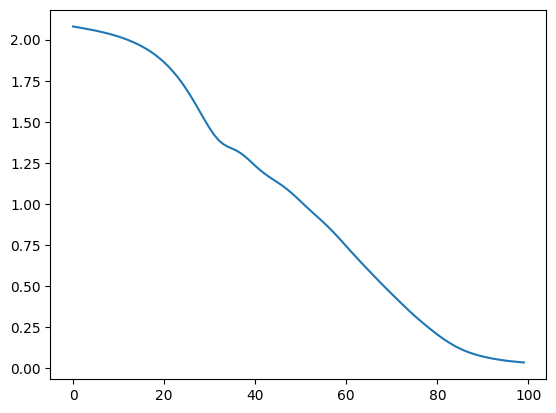

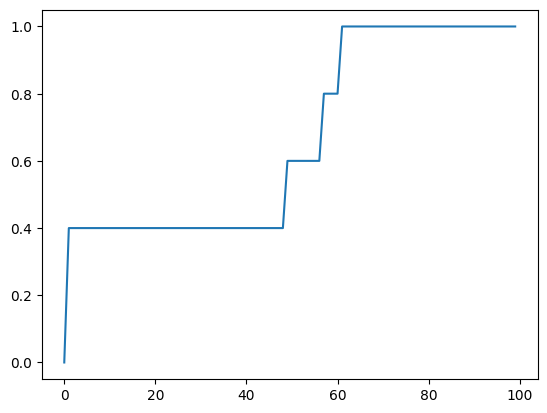

In [16]:
plt.gcf()
plt.plot(range(100), intro_history.history['loss'])
plt.show()

plt.gcf()
plt.plot(range(100), intro_history.history['accuracy'])
plt.show()

In [18]:
intro_lengths = []

for file in intro_songs:
    intro_word_counter = 0
    with open(os.path.join("Albums/Or Noir 2/Intros", file), 'r') as f:
        for line in f.readlines():
            intro_word_counter += len(line.split())
    intro_lengths.append(intro_word_counter)
    intro_word_counter = 0

In [19]:
intro_lengths = np.array(intro_lengths)
print(intro_lengths)
print(intro_lengths.mean())

[8]
8.0


In [20]:
intro_seed = ("")
for i in range(12):
    tokenized_seed = intro_tokenizer.texts_to_sequences([intro_seed])[0]
    padded_seed = tf.keras.preprocessing.sequence.pad_sequences([tokenized_seed], maxlen=intro_maxlen-1, padding='pre')
    probs = intro_model.predict([padded_seed])

    pred = np.argmax(probs)

    next_word = intro_tokenizer.index_word[pred]
    intro_seed+=" " + next_word

print(intro_seed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
 ouf ouf ouf ouf ouf ouf ouf ouf ouf ouf ouf ouf


# Couplets

In [7]:
couplets_songs = os.listdir('data/Verse')
couplets_lyrics = []

couplets_files = [os.path.join("data/Verse", song) for song in couplets_songs]

if "data/Verse/.DS_Store" in couplets_files:
    couplets_files.remove("data/Verse/.DS_Store")
for file in couplets_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            if len(" ".join(line.split())) > 0:
                couplets_lyrics.append(" ".join(line.split()))

In [10]:
print(couplets_lyrics)

["I never woulda thought she was livin' like that", 'Her words seemed so sincere', 'When I held her near, she would tell me how she feels', 'It felt so real to me, this girl, she had to be', 'An angel sent from Heaven just for me', "I didn't know she was already spoken for", "'Cause I'm not that kind of man", "Swear that I would've never looked her way", 'Now I feel so much shame', 'And all things have to change', "You should know that I'm holdin' her to blame", 'Do you remember when we fell in love?', 'We were young and innocent then', 'Do you remember how it all began?', 'It just seemed like heaven, so why did it end?', 'Do you remember how we used to talk?', "You know, we'd stay on the phone at night 'til dawn", 'Do you remember all the things we said?', 'Like, "I love you so," "I\'ll never let you go"', "Told me that you're doing wrong", 'Word out shocking all along', "Cryin' wolf ain't like a man", 'Throwing rocks to hide your hands', "You ain't done enough for me", "You ain't don

In [11]:
couplets_lens = [len(line.split()) for line in couplets_lyrics]
couplets_lens.sort()
print(couplets_lens[0], couplets_lens[-1])

1 18


In [12]:
while '' in couplets_lyrics:
    couplets_lyrics.remove('')

In [13]:
couplets_lens = [len(line.split()) for line in couplets_lyrics]
couplets_lens.sort()
print(couplets_lens[0], couplets_lens[-1])

1 18


In [14]:
for line in couplets_lyrics:
    if len(line.split()) == 1:
        print(f"Line: {line}")

Line: (Ah)
Line: (Ho!)
Line: Ooh
Line: Ooh
Line: Ooh
Line: Unthinkable
Line: (Whoa...oh...oh...)
Line: Uh-huh!
Line: Alive
Line: Girlfriend
Line: Girlfriend
Line: (Hoo!)
Line: (Ah-ooh-ooh)
Line: (Ah-ooh-ooh)
Line: (Ah-ooh-ooh)
Line: (Ah-ooh-ooh)
Line: (Anywhere)
Line: Understanding


In [15]:
couplets_maxlen = max(couplets_lens)
padding_type = "pre"

In [16]:
couplet_tokenizer = Tokenizer(oov_token="<OOV>", filters='"#$%&()*+,/:;<=>?@[\\]^_`{|}~\t\n')

couplet_tokenizer.fit_on_texts(couplets_lyrics)
couplet_word_index = couplet_tokenizer.word_index
print(couplet_word_index)
couplet_input_sequences = []

for line in couplets_lyrics:
    tokenized_line = couplet_tokenizer.texts_to_sequences([line])[0]

    for token in range(1, len(tokenized_line)):
        n_gram_sequence = tokenized_line[:token+1]

        couplet_input_sequences.append(n_gram_sequence)

couplet_maxlen = max([len(x) for x in couplet_input_sequences])

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(couplet_input_sequences, maxlen=couplet_maxlen, padding='pre')

couplet_xs, couplet_ys = padded_sequences[:,:-1], tf.keras.utils.to_categorical(padded_sequences[:,-1], num_classes=len(couplet_word_index) + 1)

{'<OOV>': 1, 'you': 2, 'the': 3, 'i': 4, 'to': 5, 'and': 6, 'me': 7, 'a': 8, 'my': 9, 'in': 10, 'it': 11, 'that': 12, 'of': 13, 'is': 14, 'your': 15, 'she': 16, 'be': 17, 'on': 18, 'for': 19, 'got': 20, 'so': 21, 'love': 22, 'this': 23, 'all': 24, "don't": 25, 'but': 26, 'just': 27, 'what': 28, "i'm": 29, 'no': 30, 'her': 31, 'was': 32, 'time': 33, 'he': 34, 'know': 35, 'do': 36, 'with': 37, 'can': 38, "you're": 39, "it's": 40, 'when': 41, 'get': 42, 'baby': 43, 'like': 44, 'girl': 45, 'we': 46, 'if': 47, 'never': 48, "she's": 49, 'out': 50, 'see': 51, 'say': 52, 'they': 53, "'cause": 54, 'there': 55, 'now': 56, 'have': 57, 'are': 58, 'yeah': 59, 'come': 60, "can't": 61, 'tell': 62, 'will': 63, 'go': 64, 'from': 65, 'feel': 66, "there's": 67, 'not': 68, 'make': 69, 'life': 70, 'every': 71, 'one': 72, 'wanna': 73, 'oh': 74, 'then': 75, "i'll": 76, 'let': 77, 'want': 78, 'take': 79, 'need': 80, 'away': 81, "i've": 82, 'down': 83, 'ah': 84, 'hold': 85, 'how': 86, 'really': 87, "ain't": 88

In [17]:
couplet_inputs = tf.keras.layers.Input(shape=(couplet_xs.shape[1],))

couplet_x = tf.keras.layers.Embedding(input_dim=len(couplet_word_index) + 1, output_dim=256)(couplet_inputs)

couplet_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(couplet_x)
couplet_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(couplet_x)
couplet_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256))(couplet_x)
couplet_outputs = tf.keras.layers.Dense(len(couplet_word_index) + 1, activation='softmax')(couplet_x)


couplet_model = tf.keras.models.Model(inputs=couplet_inputs, outputs=couplet_outputs)
couplet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 17, 256)        │       568,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 17, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 17, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2220)           │     1,138,860 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,907,628 (22.54 MB)

 Trainable params: 5,907,628 (22.54 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
epochs = 100
couplet_loss = tf.keras.losses.CategoricalCrossentropy()
couplet_optimizer = tf.keras.optimizers.Adam()

couplet_model.compile(loss=couplet_loss, optimizer=couplet_optimizer, metrics=['accuracy'])

In [19]:
print(couplet_xs.shape)

(12121, 17)


In [20]:
couplet_history = couplet_model.fit(couplet_xs, couplet_ys, epochs=epochs)

Epoch 1/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 92s 233ms/step - accuracy: 0.0353 - loss: 6.6209
Epoch 2/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 88s 231ms/step - accuracy: 0.0387 - loss: 5.9879
Epoch 3/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 91s 239ms/step - accuracy: 0.0481 - loss: 5.7368
Epoch 4/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 101s 266ms/step - accuracy: 0.0672 - loss: 5.5212
Epoch 5/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 93s 245ms/step - accuracy: 0.0912 - loss: 5.2914
Epoch 6/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 84s 220ms/step - accuracy: 0.1075 - loss: 5.0965
Epoch 7/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.1248 - loss: 4.9107
Epoch 8/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 82s 216ms/step - accuracy: 0.1344 - loss: 4.7182
Epoch 9/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - accuracy: 0.1418 - loss: 4.5349
Epoch 10/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 84s 221ms/step - accuracy: 0.1648 - loss: 4.3545
Epoch 11/100
379/379 ━━━━━━━━━━━━━━━━━━━━ 83s 218ms/step - accuracy: 0.1839 - loss: 4.1701
Epoch 1

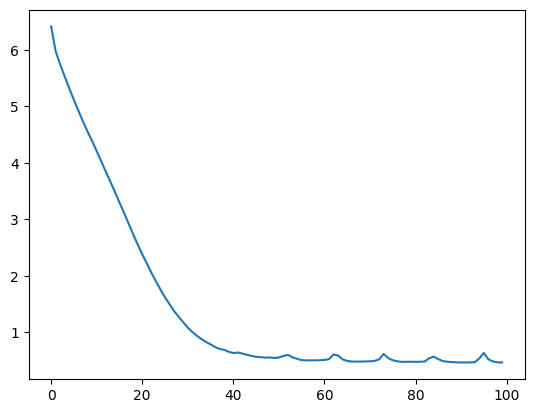

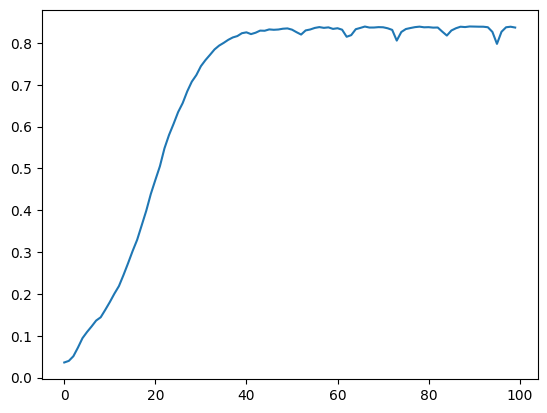

In [21]:
plt.gcf()
plt.plot(range(100), couplet_history.history['loss'])
plt.show()

plt.gcf()
plt.plot(range(100), couplet_history.history['accuracy'])
plt.show()

In [22]:
couplet_lengths = []
if ".DS_Store" in couplets_songs:
    couplets_songs.remove(".DS_Store")
for file in couplets_songs:
    couplets_word_counter = 0
    with open(os.path.join("data/Verse", file), 'r') as f:
        for line in f.readlines():
            couplets_word_counter += len(line.split())
    couplet_lengths.append(couplets_word_counter)
    couplets_word_counter = 0

In [23]:
couplet_lengths = np.array(couplet_lengths)
print(couplet_lengths)
print(couplet_lengths.mean())

[ 90  68 174 114  92  79 106  14  46  72 187  43  92 116  70  42  81  40
 119  42  38  84  54  27  14 150  78  57  63  86  52 118  30   0  92  46
   0  71  31  89 112 365 162  31  75 149  42 172  47 107 115 108  85  63
 143  68  93  73 185  70  89  32 209  52 103 127 102 104 108  63 194 148
  90  74 100  63  36  61 116  59  95  68 187  25  52  42  48  23 165  83
  53  38  56 152  83 268  49  44 307  26 124 124  97  40  45  57  98 218
  46  37 144 134  54 158  92  88 102 160  77 147  42  71  40  27 155  85
 131  40 200  32  97  86  77  38 172 105  67 151  93  62  76 134  92 177
  63 180  80 111 147  41  38  83  22  71]
91.25974025974025


In [24]:
couplet_seed = ("")
for i in range(91):
    tokenized_seed = couplet_tokenizer.texts_to_sequences([couplet_seed])[0]
    padded_seed = tf.keras.preprocessing.sequence.pad_sequences([tokenized_seed], maxlen=couplet_maxlen-1, padding='pre')
    probs = couplet_model.predict([padded_seed])

    pred = np.argmax(probs)

    next_word = couplet_tokenizer.index_word[pred]
    couplet_seed+=" " + next_word

print(couplet_seed)

/Users/romainlaup/Desktop/Perso/Projects/MJ-Generator/venv/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 17))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

# Refrain

In [ ]:
refrains_songs = os.listdir('Or Noir/Refrains')
refrains_lyrics = []

files = [os.path.join("Or Noir/Refrains", song) for song in refrains_songs]
for file in files:
    with open(file, 'r') as f:
        for line in f.readlines():
            if len(line) > 0:
                refrains_lyrics.append(" ".join(line.split()))

In [ ]:
print(refrains_lyrics)

In [ ]:
refrain_lens = [len(line.split()) for line in refrains_lyrics]
refrain_lens.sort()
print(refrain_lens[0], refrain_lens[-1])

In [ ]:
refrain_maxlen = max(refrain_lens)
padding_type = "pre"

In [ ]:
refrain_tokenizer = Tokenizer(oov_token="<OOV>", filters='"#$%&()*+,/:;<=>?@[\\]^_`{|}~\t\n')

refrain_tokenizer.fit_on_texts(refrains_lyrics)
refrain_word_index = refrain_tokenizer.word_index
print(refrain_word_index)
refrain_input_sequences = []

for line in couplets_lyrics:
    tokenized_line = refrain_tokenizer.texts_to_sequences([line])[0]

    for token in range(1, len(tokenized_line)):
        n_gram_sequence = tokenized_line[:token+1]

        refrain_input_sequences.append(n_gram_sequence)

maxlen = max([len(x) for x in refrain_input_sequences])

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(refrain_input_sequences, maxlen=maxlen, padding='pre')

refrain_xs, refrain_ys = padded_sequences[:,:-1], tf.keras.utils.to_categorical(padded_sequences[:,-1], num_classes=len(refrain_word_index) + 1)

In [ ]:
refrain_inputs = tf.keras.layers.Input(shape=(refrain_xs.shape[1],))

refrain_x = tf.keras.layers.Embedding(input_dim=len(refrain_word_index) + 1, output_dim=128)(refrain_inputs)

refrain_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(refrain_x)
refrain_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(refrain_x)
refrain_x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(refrain_x)
refrain_outputs = tf.keras.layers.Dense(len(refrain_word_index) + 1, activation='softmax')(refrain_x)


refrain_model = tf.keras.models.Model(inputs=refrain_inputs, outputs=refrain_outputs)
refrain_model.summary()

In [ ]:
epochs = 100
refrain_loss = tf.keras.losses.CategoricalCrossentropy()
refrain_optimizer = tf.keras.optimizers.Adam()

refrain_model.compile(loss=refrain_loss, optimizer=refrain_optimizer, metrics=['accuracy'])

In [ ]:
print(refrain_xs.shape)

In [ ]:
refrain_history = refrain_model.fit(refrain_xs, refrain_ys, epochs=epochs)

In [ ]:
plt.gcf()
plt.plot(range(100), refrain_history.history['loss'])
plt.show()

plt.gcf()
plt.plot(range(100), refrain_history.history['accuracy'])
plt.show()

In [ ]:
refrain_lengths = []

for file in refrains_songs:
    refrain_word_counter = 0
    with open(os.path.join("Or Noir/Refrains", file), 'r') as f:
        for line in f.readlines():
            refrain_word_counter += len(line.split())
    refrain_lengths.append(refrain_word_counter)
    refrain_word_counter = 0

In [ ]:
refrain_lengths = np.array(refrain_lengths)
print(refrain_lengths)
print(refrain_lengths.mean())

In [ ]:
refrain_seed = ("")
for i in range(80):
    tokenized_seed = refrain_tokenizer.texts_to_sequences([refrain_seed])[0]
    padded_seed = tf.keras.preprocessing.sequence.pad_sequences([tokenized_seed], maxlen=refrain_maxlen-1, padding='pre')
    probs = refrain_model.predict([padded_seed])

    pred = np.argmax(probs)

    next_word = refrain_tokenizer.index_word[pred]
    refrain_seed+=" " + next_word

print(refrain_seed)